In [268]:
import os
import numpy as np
import pandas as pd
from scipy.optimize import *
from lmfit import Model
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import datetime

date = datetime.datetime.now().strftime('%a, %d %b %Y %H-%M-%S %Z(%z)')
%matplotlib inline

#### Exposure Intensity ($mW/cm^2$)

In [248]:
# creating an empty list for exposure intensity
I_o = [] #exposure intensity
  
# number of elements as input 
n = int(input("# Enter number of Intensity to vary: ")) 
  
# iterating till the range 
for i in range(0, n): 
    intensity = float(input("Enter Intensity: ")) 
  
    I_o.append(intensity) # adding the element 
#I_o = np.array(I_o)
      
print("Exposure Intensity to vary: ", I_o)

# Enter number of Intensity to vary: 25
Enter Intensity: 0.1
Enter Intensity: 0.2
Enter Intensity: 0.25
Enter Intensity: 0.3
Enter Intensity: 0.4
Enter Intensity: 0.5
Enter Intensity: 0.6
Enter Intensity: 0.7
Enter Intensity: 0.85
Enter Intensity: 1
Enter Intensity: 1.3
Enter Intensity: 1.5
Enter Intensity: 1.75
Enter Intensity: 2
Enter Intensity: 2.5
Enter Intensity: 3
Enter Intensity: 3.5
Enter Intensity: 4
Enter Intensity: 4.5
Enter Intensity: 5
Enter Intensity: 5.5
Enter Intensity: 6
Enter Intensity: 6.5
Enter Intensity: 7
Enter Intensity: 7.5
Exposure Intensity to vary:  [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.85, 1.0, 1.3, 1.5, 1.75, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5]


#### Exposure Time ($seconds$)

In [161]:
# creating an empty list for exposure time t 
t = []  #Exposure time, t
  
# number of elements as input 
n = int(input("# Enter number of time to vary : ")) 
  
# iterating till the range 
for i in range(0, n): 
    exp_time = float(input("Enter time: ")) 
  
    t.append(exp_time) # adding the element 
#t = np.array(t)      
print("Exposure time to measure: ", t)

# Enter number of time to vary : 60
Enter time: 0.2
Enter time: 0.3
Enter time: 0.5
Enter time: 0.8
Enter time: 1
Enter time: 1.4
Enter time: 1.7
Enter time: 2
Enter time: 2.2
Enter time: 2.5
Enter time: 2.8
Enter time: 3.5
Enter time: 4
Enter time: 4.5
Enter time: 5
Enter time: 5.5
Enter time: 6
Enter time: 6.5
Enter time: 7
Enter time: 7.5
Enter time: 8
Enter time: 8.5
Enter time: 9
Enter time: 9.5
Enter time: 10
Enter time: 10.5
Enter time: 11
Enter time: 11.5
Enter time: 12
Enter time: 12.5
Enter time: 13
Enter time: 13.5
Enter time: 14
Enter time: 14.5
Enter time: 15
Enter time: 15.5
Enter time: 16
Enter time: 16.5
Enter time: 17
Enter time: 17.5
Enter time: 18
Enter time: 18.5
Enter time: 19
Enter time: 19.5
Enter time: 20
Enter time: 20.5
Enter time: 21
Enter time: 21.5
Enter time: 22
Enter time: 22.5
Enter time: 23
Enter time: 23.5
Enter time: 24
Enter time: 24.5
Enter time: 26
Enter time: 27
Enter time: 28
Enter time: 29
Enter time: 30
Enter time: 31
Exposure time to measure: 

#### Input Parameters

In [162]:
#def inputparameters():
#u = input("Concentration of the monomer: ")
u_m = input("Initial Monomer Concentration: ") #typical value 
#D = input("Diffusion coefficient: ")
#I = input("Light intensity: ")
k_o = input("Polymerization coefficient: ") #value can be modified based on experiment e.g 0.45
tau_d = input("Diffusion time constant τD: ") #value can be modified based on experiment e.g 3.5
#t = input("Exposure time: ") #uncomment to run for a single number 
#I_o = input("Exposure Intensity: ") #uncomment to run for a single number
phi = 0.0082 #constant relating to material φ
delta_nm = input("Maximum amplitude of the grating modulation: ") #Delta_n_M = Cn*δ*U_m e.g. 0.0143
m = 1 #constant
I_t = 0.01 #Lowest intensity required for the material exposure that can be measured by the experiemnt
t_p = input("Polymerization time: ") #Smaller than exposure time t typycal is 8.2, 3.1
w = 10^5;
small_delta = 0.90 #Order of magnitude of light reaction δ
C_n = float(delta_nm)/(float(small_delta)*float(u_m))
gamma = float(k_o)/phi  #constant 54.8780, 0.0143
print ("\n", "\n", "Input Parameters\n", "Initial Monomer Concentration 𝑈𝑚: ", u_m, "\n", "Polymerization coefficient Ko: ", k_o, "\n", 
            "Diffusion time constant τD: ", tau_d, "\n","Maximum amplitude of the grating modulation Δ𝑛𝑚: ", delta_nm, "\n",
           "Polymerization time tp: ", t_p, "\n", "\n", "Constants\n", "m: ", m, "\n","C_n: ", C_n,"\n", 
            "Lowest Intensity required I_t: ", I_t, "\n","phi φ: ", phi, "\n","Order of magnitude of light reaction δ: ", small_delta,"\n", "Gamma: ", gamma, "\n",
            "Model Accuracy Constant (w): ", w)
    
#    return (u_m, k_o,tau_d, delta_nm, t_p, m, C_n, I_t, phi, small_delta, gamma, w)    

def writeinput():
    all_ = ["Date: ", str(date), "\n", "\n", "Input Parameters\n", "Initial Monomer Concentration 𝑈𝑚: ", str(u_m),  "\n", "Polymerization coefficient Ko: ", str(k_o), "\n", 
           "Diffusion time constant τD: ", str(tau_d), "\n", "Maximum amplitude of the grating modulation Δ𝑛𝑚: ", str(delta_nm), "\n", 
           "Polymerization time tp: ", str(t_p), "\n", "\n", "Constants\n", "m: ", str(m), "\n", "C_n: ", str(C_n), "\n",  "Lowest Intensity required I_t: ", str(I_t), "\n",
            "phi φ: ", str(phi), "\n", "Order of magnitude of light reaction δ: ", str(small_delta), "\n", "Gamma: ", str(gamma), "\n", "Model Accuracy Constant (w): ", str(w), "\n" ]
    return (all_)

Initial Monomer Concentration: 2.5
Polymerization coefficient: 0.45
Diffusion time constant τD: 3.5
Maximum amplitude of the grating modulation: 0.0143
Polymerization time: 3.1

 
 Input Parameters
 Initial Monomer Concentration 𝑈𝑚:  2.5 
 Polymerization coefficient Ko:  0.45 
 Diffusion time constant τD:  3.5 
 Maximum amplitude of the grating modulation Δ𝑛𝑚:  0.0143 
 Polymerization time tp:  3.1 
 
 Constants
 m:  1 
 C_n:  0.006355555555555555 
 Lowest Intensity required I_t:  0.01 
 phi φ:  0.0082 
 Order of magnitude of light reaction δ:  0.9 
 Gamma:  54.8780487804878 
 Model Accuracy Constant (w):  15


### Diffusion Model Theory

***References:***  
1.  G. Zhao and P. Mouroulis, “Diffusion model of hologram formation in dry photopolymer materials,” J. Mod. Opt. 41, 1929–1939 (1994).  
2. S. Gallego, C. Neipp, M. Ortuño, A. Beléndez, E. Fernández, and I. Pascual, “Analysis of monomer diffusion in depth in photopolymer materials,” Opt. Commun. 274, 43–49 (2007)  
3. S. Piazzolla and B. K. Jenkins, “First-harmonic diffusion model for holographic grating formation in photopolymers,” J. Opt. Soc. Am. B 17, 1147–1157 (2000).  
4. H. Li, Y. Qi, R. E. Malallah, and J. T. Sheridan, “Three-dimensional numerical model of holographic grating formation in photopolymer materials,” Proc. SPIE 9508, 95080B (2015)  
5. J. Christmann, C. Ley, X. Allonas, A. Ibrahim, and C. CroutxéBarghorn, “Experimental and theoretical investigations of free radical photopolymerization: Inhibition and termination reactions,” Polymer 160, 254–264 (2019)  
6. Ma, J., Wu, T., Cui, Y., Li, J., Wang, J. and Su, P., 2020. Modified monomer diffusion model for volume holographic grating formation in photopolymers. Applied Optics, 59(13), pp.3952-3958.  

****

##### Historical Review
* ***Zhao et al***. solved diffusion equation for sinusoidal exposure in photopolymers using low-order harmonic approximation [1]   
    + _Found that monomer concentration has monotonic relationship with refractive index modulation_ <br>
    + _Monomer molecules diffusion was responsible for volume holographic grating_  

$$\frac{du(x,t)}{dt} = \frac{\partial }{\partial x} \left({D(x,t)\frac{u(x,t)}{dx}} \right) - F(x,t)u(x,t)$$

 where:

<p style="text-align: left;">    
    <br> $u(x,t)$ is monomer concentration    <br>
    $F(x,t)$ is rate of polymerization    <br>
    $D(x,t)$ is diffusion coefficient    <br>
</p>


* ***Piazolla and Jenkins***. used first order diffusion equation to obtain specific analytical solution of the monomer diffusion model [3]  
   +  _Considered photopolymers and free monomer diffusion during holographic exposure_ <br>
   +  _Predicts variation in the saturated diffraction efficiency with exposure intensity_ <br>
   + _Basic equation proposed is:
    
$$\frac{du(x,t)}{dt} = \frac{\partial }{\partial x} D  \frac{\partial }{\partial x}u(x,t) - k(t)I^\delta u(x,t)$$

 where:

<p style="text-align: left;">    
    <br> $u(x,t)$ is monomer concentration    <br>
    $D$ is diffusion coefficient    <br>
    $k(t)$ is polymerization coefficient    <br>
    $I(x)$ is light intensity    <br>
    $\delta$ is the order of magnitude of light reaction    <br>
    $k(t)I^\delta(x)$ is the polymerization rate </p>
 
$$ u(x,t) = u_o (t) - u_1 (t) \cos (kx) $$

 where:

<p style="text-align: left;">    
    <br> $u_o(t)$ is the dc term    <br>
    $u_o(t)$ is first order amplitude    <br>
    $k$ is the interference fringe vector    <br>
     </p>

$$\frac{d \Delta_n(t)}{dt} = C_n  \left(\frac {u_1(t)}{\tau_D}\right)$$

 where:

<p style="text-align: left;">    
    <br> $\tau$ is polymerization constant  <br>
    $\tau_D$ is Diffusion constant    <br>
    $t$ is exposure time    <br>
     </p>

[3] obtained refractive index modulation as follow:

$$ \Delta_n(t) = \frac{m \tau \Delta_(nm)}{\tau_D + \tau} \left [1 - \exp(\gamma[1 - \exp(\frac{t}{\tau}) \right] - \frac{\tau_D \gamma}{\tau_D \gamma + \tau}\left [1 - \exp \left(\frac {\tau_D \gamma}{- \tau_D \gamma + \tau}\right)\right]$$ 
    
 where:

<p style="text-align: left;">    
    <br> $m$ is a constant    <br>
    $\Delta_(nm) = C_n \delta U_m$ is the maximum amplitude of the grating modulation    <br>
    $C_n$ is a constant    <br>
    $U_m$ is the initial monomer concentration    <br>
    $k_0$ is polymerization coefficient    <br>
    $\gamma$ = $k_0 \phi$ is is a constant    <br>
    $I$ is exposure intensity    <br>
    $\tau = \frac{1}{\phi I^\delta}$ polymerization time constant    <br>
    $\delta$ and $\phi$ are constants whose values relates to material </p>    

* ***Gallego et al***. developed a 3D photopolymer model based on the thick volume holographic grating, they assumed that change in depth direction of the monomer was very small and could be neglected [2]



* ***Li et al***. developed a 3D numerical model to describe the change in refractive index of the volume holographic grating in the x, y and z direction [4]



* ***Christmann et al*** discussed the role of disolved oxygen in intial radical polymerization stage [5]

#### Pazzolla Diffusion Model

In [269]:
def Index_Modulation_Piazzolla():
        d_n1 = []
        Exposure_Time = []
        Exposure_Intensity = []
        for i in t:
            for k in I_o:
                tau = 1/(phi*np.power(k, float(small_delta)))
                dp = ((m*float(tau)*float(delta_nm))/(float(tau_d) + float(tau))) * (1-np.exp(float(gamma)*(1-np.exp(i/float(tau))))-((float(tau_d)*float(gamma))/((float(tau_d)*float(gamma))+float(tau)))*(1-np.exp(-((float(tau_d)*float(gamma))+float(tau))/(float(tau_d)*float(gamma)))*i))
                d_n1.append(dp)
                Exposure_Time.append(i)
                Exposure_Intensity.append(k)
        data_p=[]        
        for time,I,dn in zip(Exposure_Time, Exposure_Intensity,d_n1):
            dat_p = {'Exposure_Time': time, 'Exposure_Intensity':I, 'Index_Modulation':dn}
            data_p.append(dat_p)
            df1 = pd.DataFrame(data_p, columns=['Exposure_Time','Exposure_Intensity', 'Index_Modulation'])
            df1.fillna(0, inplace=True)
        return df1

Constrast_p = Index_Modulation_Piazzolla()

In [270]:
#Convert data to dataframe and saving input and output
df = pd.DataFrame(Constrast_p, columns=['Exposure_Time','Exposure_Intensity', 'Index_Modulation'])
filename1 = date + "Piazzolla_Diffusion_Model" + " Output"
filename2 = date + "Piazzolla_Diffusion_Model" + " Input Parameters"
F = open(filename2 + ".txt", "a", encoding='utf-8')
F.writelines(writeinput())
F.close()
df.to_csv(filename1, encoding='utf-8', index=False)
df.tail(20) #To view the top 20 alone
#df1 #To view all

,Exposure_Time,Exposure_Intensity,Index_Modulation
1480,31.0,0.50,0.030113
1481,31.0,0.60,0.036262
1482,31.0,0.70,0.042042
1483,31.0,0.85,0.049897
1484,31.0,1.00,0.056788
1485,31.0,1.30,0.068091
1486,31.0,1.50,0.074149
1487,31.0,1.75,0.080447
1488,31.0,2.00,0.085631
1489,31.0,2.50,0.093566


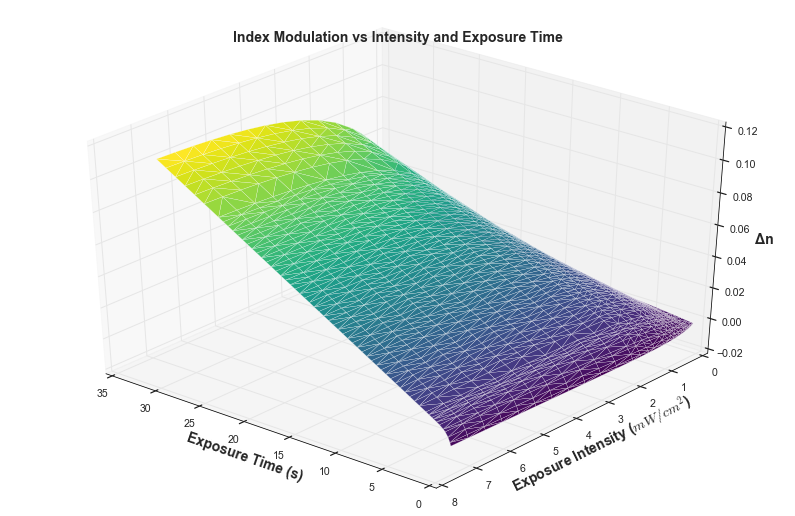

In [271]:
fig = plt.figure(figsize =(14, 9))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Exposure_Time'], df['Exposure_Intensity'],df['Index_Modulation'], cmap=plt.cm.viridis, linewidth=0.2)
ax.view_init(35, 130)
#fig.colorbar(surf, shrink=0.6, aspect=9)
ax.set_title('Index Modulation vs Intensity and Exposure Time', fontsize=14, fontweight="bold");
ax.set_ylabel('Exposure Intensity ($mW/cm^2$)', fontsize=14, fontweight="bold")
ax.set_xlabel('Exposure Time (s)', fontsize=14, fontweight="bold")
ax.set_zlabel('Δn', fontsize=14, fontweight="bold");

plt.savefig('Piazzolla Diffusion Model' + date + '.jpeg', bbox_inches='tight') #can be .pdf,png, tif, jpeg, etc
plt.show()

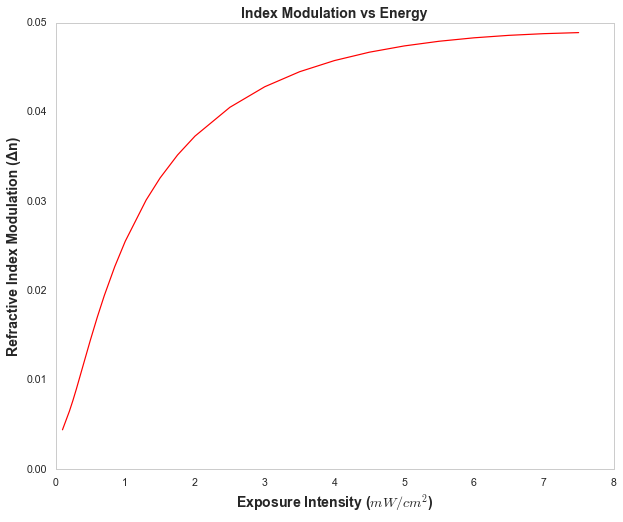

In [272]:
fig, (ax1) = plt.subplots(figsize=(10,8))

ax1 =sns.set(style='whitegrid', rc={"axes.labelsize":12})
ax1 =sns.set_context("paper", font_scale=2)
plt.grid(None)

ax1 = sns.lineplot(x = df['Exposure_Intensity'], y = df['Index_Modulation'], color="red", ci=None)
ax1.set_title('Index Modulation vs Energy', fontsize=14, fontweight="bold");
ax1.set_xlabel('Exposure Intensity ($mW/cm^2$)', fontsize=14, fontweight="bold");
ax1.set_ylabel('Refractive Index Modulation (Δn)', fontsize=14, fontweight="bold");

plt.savefig('Piazzolla Diffusion Model plot' + date + '.jpeg', bbox_inches='tight') #can be .pdf,png, tif, jpeg, etc

### Modified Diffusion Model [5]

Subsitute the following into Piazzolla model: <br>
$$\Delta_nm = C_n \delta U_m$$ <br>
$$\tau = \frac{1}{\phi I^\delta}$$


$$ \Delta_n(t) = \frac {m C_n \delta U_m}{\phi I_0^\delta (\tau_D + \frac{1}{\phi I_0^\delta})}* \left[1- \exp \left(\frac{k_0[1-\exp(t_p \phi I_0^\delta)]}{\phi} \right)\right] - \frac {\tau_D k_0}{\phi I_0^\delta(\tau_D + \frac{1}{\phi I_0^\delta})} \left[1-\exp \frac{\frac{-\tau_D k_0}{\phi} + \frac{1}{\phi I_0^\delta} t_p \phi I_0^\delta }{\tau_D}\right] * \frac{1}{1+\exp[-w(I_0 - I_t]}\frac{1}{1+\exp[-w[t-\psi\exp(-\alpha I_0)]]} $$


#### Threshold added to Piazolla Model by [5]

* light intensity factor is the second to the last part of the equation and 
$$ \frac{1}{1+\exp[-w(I_0 - I_t]} $$
* oxygen molecule inhibitor factor is the last part
$$ \frac{1}{1+\exp[-w[t-\psi\exp(-\alpha I_0)]]} $$

*if $I_0$ ≥ $I_t$, $t$ the threshold factor of light intensity is $1$;*

*if $I_0$ < $I_t$ , the value of the light intensity threshold factor is $0$, and there is no refractive index, the modulation phenomenon occurs*

*For oxygen molecule inhibitors, if $t_p$ ≥ $0$, the oxygen molecule inhibitor*
factor is $1$, which means that oxygen does not undergo chemical reaction, and polymerization proceeds;*

*if $t_p$ < $0$, the oxygen molecule inhibitor factor is $0$, which means that polymerization
is inhibited by the dissolution of oxygen, and the refractive index modulation is  $0$*

#### Modified Model (This model is not yet working as desired)

In [44]:
def Index_Modulation():
        d_n = []
        Exposure_Time = []
        Exposure_Intensity = []
        for i in t:
            for k in I_o:
                polymerization_time_parameters = (i - float(t_p))/(np.exp(k))
                """polymerization_time_parameters = − ψ exp(−α)
                Calcualted from tp  = t − ψ exp(−α)
                psi = Oxygen time constant ψ             
                """
                light_intensity_factor =(1/(1+np.exp(-w*(k - I_t))))
                oxygen_molecule_inhibitor_factor = (1/(1+np.exp(-w*(i-polymerization_time_parameters))))            
                d = ((m*float(delta_nm))/(float(phi)*np.power(k,float(small_delta))*((float(tau_d))+(1/phi*np.power(k,float(small_delta))))))*(1-np.exp(float(k_o)*(1-np.exp(float(t_p)*float(phi)*np.power(k,float(small_delta))))/float(phi))-((float(tau_d)*float(k_o))/((float(phi))*((float(tau_d)*float(k_o)/float(phi))+(1/(float(phi)*np.power(k,float(small_delta)))))))*(1-np.exp(-(((float(tau_d)*float(k_o)/float(phi))+(1/(float(phi)*np.power(k,float(small_delta)))))/(float(tau_d)))*(float(t_p)*float(phi)*np.power(k,float(small_delta))))))*light_intensity_factor*oxygen_molecule_inhibitor_factor
                d_n.append(d)
                Exposure_Time.append(i)
                Exposure_Intensity.append(k)
        data=[]        
        for time,I,dn in zip(Exposure_Time, Exposure_Intensity,d_n):
            dat = {'Exposure_Time': time, 'Exposure_Intensity':I, 'Index_Modulation':dn}
            data.append(dat)
            df = pd.DataFrame(data, columns=['Exposure_Time','Exposure_Intensity', 'Index_Modulation'])
            df.fillna(0, inplace=True)
        return df

Constrast = Index_Modulation()

In [45]:
#Convert data to dataframe
df = pd.DataFrame(Constrast, columns=['Exposure_Time','Exposure_Intensity', 'Index_Modulation'])
filename1 = date + "Modified_Diffusion_Model " + "Output"
filename2 = date + "Modified_Diffusion_Model " + "Input"
F = open(filename2 + ".txt", "a", encoding='utf-8')
F.writelines(writeinput())
F.close()
df.to_csv(filename1, encoding='utf-8', index=False)
df.head(20)

,Exposure_Time,Exposure_Intensity,Index_Modulation
0,0.1,0.01,0.074344
1,0.1,0.10,0.030972
2,0.1,0.25,0.016216
3,0.1,0.30,0.013560
4,0.1,0.35,0.011514
5,0.1,0.40,0.009908
6,0.1,0.50,0.007585
7,0.1,1.00,0.002883
8,0.1,2.00,0.000837
9,0.1,2.20,0.000688


In [ ]:
fig = plt.figure(figsize =(14, 9))
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Exposure_Time'], df['Exposure_Intensity'],df['Index_Modulation'], cmap=plt.cm.viridis, linewidth=0.2)
ax.view_init(45, 130)
#fig.colorbar( surf, shrink=0.6, aspect=9)
ax.set_ylabel('Exposure Intensity ($m/cm^2$)', fontsize=14)
ax.set_xlabel('Exposure Time (s)', fontsize=14)
ax.set_zlabel('Δn', fontsize=14);
plt.show()

In [ ]:
fig, (ax1) = plt.subplots(figsize=(10,6))

ax1 =sns.set(style='whitegrid', rc={"axes.labelsize":10})
ax1 =sns.set_context("paper", font_scale=1.2)

ax1 = sns.lineplot(x = df['Exposure_Intensity'], y = df['Index_Modulation'], color="red")
ax1.set_title('Index Modulation vs Energy', fontsize=14);
ax1.set_xlabel('Exposure Intensity ($m/cm^2$)', fontsize=14);
ax1.set_ylabel('Refractive Index Modulation (Δn)', fontsize=14);

### Kogelnik Coupled Wave Equation

##### On Bragg

In [345]:
Delta_n = df['Index_Modulation'].to_list()
Bragg_angle_ext = np.deg2rad(18) #Bragg angle for red beam, it is 12 for blue beam #EXTERNAL BRAGG
Bragg_angle_int = np.arcsin((1/1.5)*(np.sin(Bragg_angle_ext)))

def onbragg(Lambda,Period,n_nut,phi,Delta_Lambda,L):
    K = (2*math.pi)/Period
    Beta = (2*math.pi*(n_nut))/Lambda
    nu = ((math.pi*df.Index_Modulation*L)/(Lambda)*((((np.cos(Bragg_angle_int)**2))-((K*np.cos(phi)*np.cos(Bragg_angle_int))/Beta))**0.5))
    DE_Kb = (np.sin(nu)**2)
#    print ("The Modulation Parameter on bragg is: ", nu)
#    print("Diffraction Efficiency at Bragg Condition is: ", DE_Kb)
    return DE_Kb 
    

#Vary wavelenth between blue and red (on next cell)
DE_Kb= onbragg(633e-9, 2e-6, 1.5, 90, 0, 25e-6)
df['Diffraction_Efficiency'] = DE_Kb

#red wavelenth but vary pitch from one to 2 in DE_Kb4
DE_Kb3= onbragg(633e-9, 0.5e-6, 1.5, 90, 0, 25e-6)
DE_Kb4= onbragg(633e-9, 2e-6, 1.5, 90, 0, 25e-6)
df['Diffraction_Efficiency_p1'] = DE_Kb3
df['Diffraction_Efficiency_p2'] = DE_Kb4

#vary thickness from 25 to 250 microns
DE_Kb5= onbragg(633e-9, 2e-6, 1.5, 90, 0, 25e-6)
DE_Kb6= onbragg(633e-9, 2e-6, 1.5, 90, 0, 50e-6)
DE_Kb7= onbragg(633e-9, 2e-6, 1.5, 90, 0, 100e-6)
DE_Kb8= onbragg(633e-9, 2e-6, 1.5, 90, 0, 250e-6)
DE_Kb9= onbragg(633e-9, 2e-6, 1.5, 90, 0, 200e-6)
df['Diffraction_Efficiency_L1'] = DE_Kb5
df['Diffraction_Efficiency_L2'] = DE_Kb6
df['Diffraction_Efficiency_L3'] = DE_Kb7
df['Diffraction_Efficiency_L4'] = DE_Kb8
df['Diffraction_Efficiency_L5'] = DE_Kb9

In [346]:
Delta_n = df['Index_Modulation'].to_list()
Bragg_angle_ext = np.deg2rad(12) #Bragg angle for red beam, it is 12 for blue beam #EXTERNAL BRAGG
Bragg_angle_int = np.arcsin((1/1.5)*(np.sin(Bragg_angle_ext)))

def onbragg2(Lambda,Period,n_nut,phi,Delta_Lambda,L):
    K = (2*math.pi)/Period
    Beta = (2*math.pi*(n_nut))/Lambda
    nu = ((math.pi*df.Index_Modulation*L)/(Lambda)*((((np.cos(Bragg_angle_int)**2))-((K*np.cos(phi)*np.cos(Bragg_angle_int))/Beta))**0.5))
    DE_Kb = (np.sin(nu)**2)
#    print ("The Modulation Parameter on bragg is: ", nu)
#    print("Diffraction Efficiency at Bragg Condition is: ", DE_Kb)
    return DE_Kb 
    

#Vary wavelenth between blue and red
DE_Kb2= onbragg2(405e-9, 0.5e-6, 1.5, 90, 0, 25e-6)
df['Diffraction_Efficiency2'] = DE_Kb2
df.head()

,Exposure_Time,Exposure_Intensity,Index_Modulation,Diffraction_Efficiency,Diffraction_Efficiency_p1,Diffraction_Efficiency_p2,Diffraction_Efficiency_L1,Diffraction_Efficiency_L2,Diffraction_Efficiency_L3,Diffraction_Efficiency_L4,Diffraction_Efficiency2,Diffraction_Efficiency_L5
0,0.2,0.10,-0.002196,0.075956,0.095371,0.075956,0.075956,0.280747,0.807712,0.117219,0.205485,0.621252
1,0.2,0.20,-0.003520,0.187285,0.232581,0.187285,0.187285,0.608836,0.952618,0.944955,0.468741,0.180546
2,0.2,0.25,-0.004020,0.239224,0.295436,0.239224,0.239224,0.727984,0.792093,0.849606,0.575439,0.658727
3,0.2,0.30,-0.004443,0.286625,0.352087,0.286625,0.286625,0.817884,0.595800,0.350608,0.663463,0.963289
4,0.2,0.40,-0.005122,0.367427,0.446945,0.367427,0.367427,0.929698,0.261439,0.051540,0.792052,0.772355


In [333]:
df1 = df.loc[df['Exposure_Intensity'] == 0.1]
df2 = df.loc[df['Exposure_Intensity'] == 0.25]
df3 = df.loc[df['Exposure_Intensity'] == 0.3]
df4 = df.loc[df['Exposure_Intensity'] == 0.4]
df5 = df.loc[df['Exposure_Intensity'] == 0.5]
df6 = df.loc[df['Exposure_Intensity'] == 0.6]

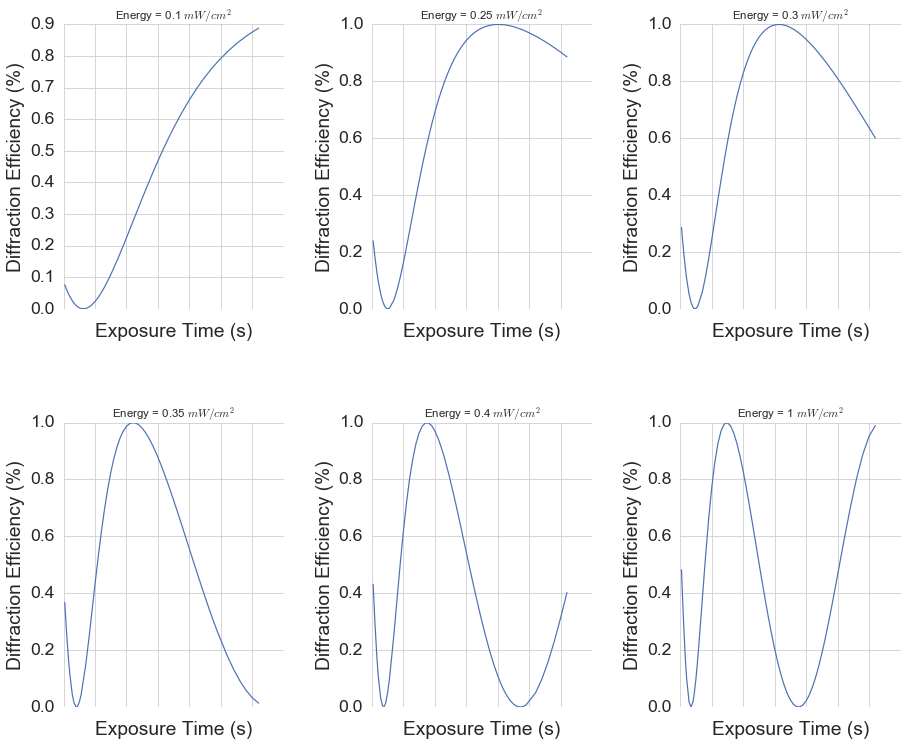

In [338]:
fig, axs = plt.subplots(figsize=(15,12), ncols=3, nrows=2)
sns.set(style='whitegrid', rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":10})
sns.set_context("paper", font_scale=1.2)


sns.lineplot(x = df1["Exposure_Time"], y = df1["Diffraction_Efficiency"], ax=axs[0][0]).set(title="Energy = 0.1 $mW/cm^2$", xlabel="Exposure Time (s)")
sns.lineplot(x = df2["Exposure_Time"], y = df2["Diffraction_Efficiency"], ax=axs[0][1]).set(title="Energy = 0.25 $mW/cm^2$", xlabel="Exposure Time (s)")
sns.lineplot(x = df3["Exposure_Time"], y = df3["Diffraction_Efficiency"], ax=axs[0][2]).set(title="Energy = 0.3 $mW/cm^2$", xlabel="Exposure Time (s)")
sns.lineplot(x = df4["Exposure_Time"], y = df4["Diffraction_Efficiency"], ax=axs[1][0]).set(title="Energy = 0.35 $mW/cm^2$", xlabel="Exposure Time (s)")
sns.lineplot(x = df5["Exposure_Time"], y = df5["Diffraction_Efficiency"], ax=axs[1][1]).set(title="Energy = 0.4 $mW/cm^2$", xlabel="Exposure Time (s)")
sns.lineplot(x = df6["Exposure_Time"], y = df6["Diffraction_Efficiency"], ax=axs[1][2]).set(title="Energy = 1 $mW/cm^2$", xlabel="Exposure Time (s)")


plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.4, wspace=0.4)

   

for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right', fontweight='light', fontsize='small');
    ax.set_ylabel("Diffraction Efficiency (%)")
    
sns.despine(left=True, bottom=True)                                                   

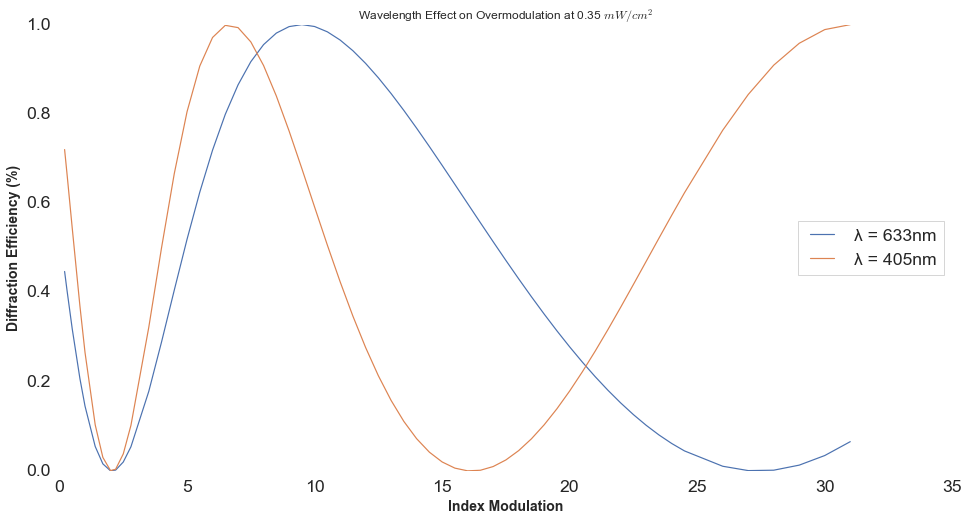

In [351]:
fig, (ax) = plt.subplots(figsize=(16,8))

ax =sns.set(style='whitegrid', rc={"axes.labelsize":14})
ax =sns.set_context("paper", font_scale=2)


sns.lineplot(x = df4["Exposure_Time"], y = df4["Diffraction_Efficiency_p1"], label="λ = 633nm")
sns.lineplot(x = df4["Exposure_Time"], y = df4["Diffraction_Efficiency2"], label="λ = 405nm")
#sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency_L3"], label="Thickness = 100μm")

plt.grid(False);
plt.title("Wavelength Effect on Overmodulation at 0.35 $mW/cm^2$", fontsize=12)
plt.ylabel("Diffraction Efficiency (%)", fontsize=14, fontweight="bold")
plt.xlabel("Index Modulation", fontsize=14, fontweight="bold");
#plt.xlim(-0.002, 0.03);
plt.legend(loc='best')
 

sns.despine(left=True, bottom=True)
plt.savefig('Figure6a' + date + '.tif', bbox_inches='tight') #can be .pdf,png, tif, jpeg, etc)  
plt.show()

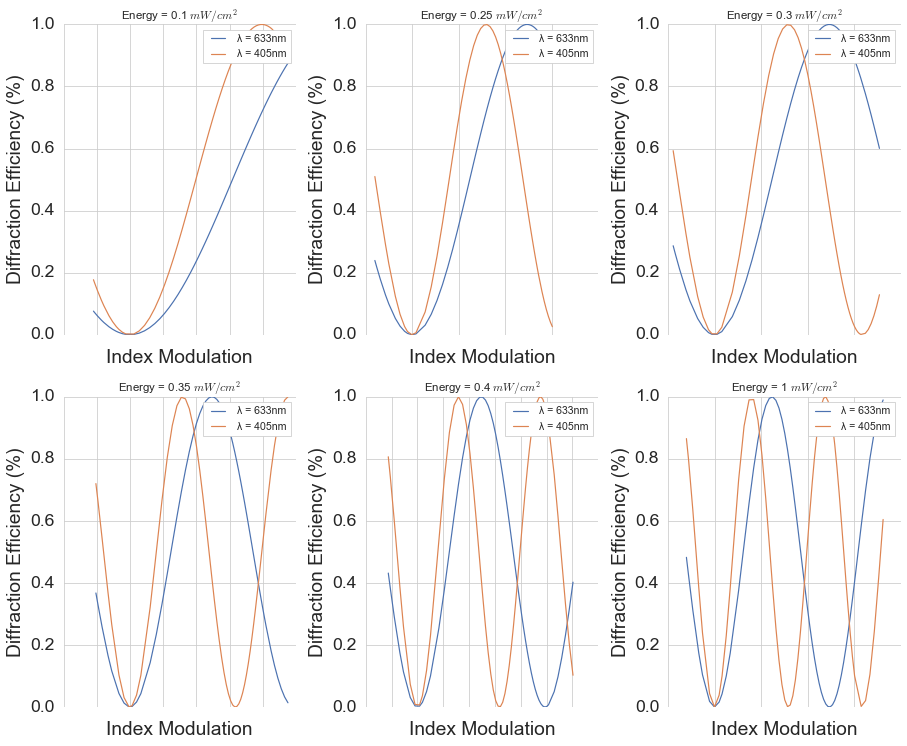

In [340]:
fig, axs = plt.subplots(figsize=(15,12), ncols=3, nrows=2)
sns.set(style='whitegrid', rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":10})
sns.set_context("paper", font_scale=1.2)

sns.lineplot(x = df1["Index_Modulation"], y = df1["Diffraction_Efficiency"], label="λ = 633nm", ax=axs[0][0]).set(title="Energy = 0.1 $mW/cm^2$", xlabel="Index Modulation")
sns.lineplot(x = df1["Index_Modulation"], y = df1["Diffraction_Efficiency2"], label="λ = 405nm", ax=axs[0][0])
sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency"], label="λ = 633nm", ax=axs[0][1]).set(title="Energy = 0.25 $mW/cm^2$", xlabel="Index Modulation")
sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency2"], label="λ = 405nm", ax=axs[0][1])
sns.lineplot(x = df3["Index_Modulation"], y = df3["Diffraction_Efficiency"], label="λ = 633nm", ax=axs[0][2]).set(title="Energy = 0.3 $mW/cm^2$", xlabel="Index Modulation")
sns.lineplot(x = df3["Index_Modulation"], y = df3["Diffraction_Efficiency2"], label="λ = 405nm", ax=axs[0][2])
sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency"], label="λ = 633nm", ax=axs[1][0]).set(title="Energy = 0.35 $mW/cm^2$", xlabel="Index Modulation")
sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency2"], label="λ = 405nm", ax=axs[1][0])
sns.lineplot(x = df5["Index_Modulation"], y = df5["Diffraction_Efficiency"], label="λ = 633nm", ax=axs[1][1]).set(title="Energy = 0.4 $mW/cm^2$", xlabel="Index Modulation")
sns.lineplot(x = df5["Index_Modulation"], y = df5["Diffraction_Efficiency2"], label="λ = 405nm", ax=axs[1][1])
sns.lineplot(x = df6["Index_Modulation"], y = df6["Diffraction_Efficiency"], label="λ = 633nm", ax=axs[1][2]).set(title="Energy = 1 $mW/cm^2$", xlabel="Index Modulation")
sns.lineplot(x = df6["Index_Modulation"], y = df6["Diffraction_Efficiency2"], label="λ = 405nm", ax=axs[1][2])

plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.2, wspace=0.3)

   

for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right', fontweight='light', fontsize='small');
    ax.set_ylabel("Diffraction Efficiency (%)")
    ax.set_xlabel("Index Modulation")
    
sns.despine(left=True, bottom=True)  

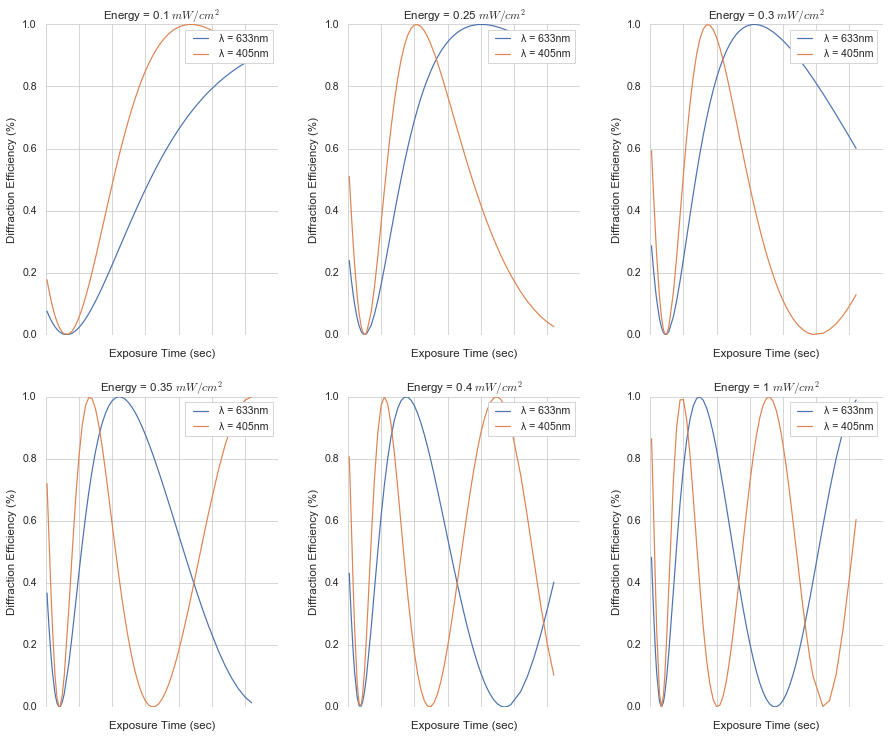

In [341]:
fig, axs = plt.subplots(figsize=(15,12), ncols=3, nrows=2)
sns.set(style='whitegrid', rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":10})
sns.set_context("paper", font_scale=1.2)

sns.lineplot(x = df1["Exposure_Time"], y = df1["Diffraction_Efficiency"], label="λ = 633nm", ax=axs[0][0]).set(title="Energy = 0.1 $mW/cm^2$", xlabel="Exposure Time")
sns.lineplot(x = df1["Exposure_Time"], y = df1["Diffraction_Efficiency2"], label="λ = 405nm", ax=axs[0][0])
sns.lineplot(x = df2["Exposure_Time"], y = df2["Diffraction_Efficiency"], label="λ = 633nm", ax=axs[0][1]).set(title="Energy = 0.25 $mW/cm^2$", xlabel="Exposure Time")
sns.lineplot(x = df2["Exposure_Time"], y = df2["Diffraction_Efficiency2"], label="λ = 405nm", ax=axs[0][1])
sns.lineplot(x = df3["Exposure_Time"], y = df3["Diffraction_Efficiency"], label="λ = 633nm", ax=axs[0][2]).set(title="Energy = 0.3 $mW/cm^2$", xlabel="Exposure Time")
sns.lineplot(x = df3["Exposure_Time"], y = df3["Diffraction_Efficiency2"], label="λ = 405nm", ax=axs[0][2])
sns.lineplot(x = df4["Exposure_Time"], y = df4["Diffraction_Efficiency"], label="λ = 633nm", ax=axs[1][0]).set(title="Energy = 0.35 $mW/cm^2$", xlabel="Exposure Time")
sns.lineplot(x = df4["Exposure_Time"], y = df4["Diffraction_Efficiency2"], label="λ = 405nm", ax=axs[1][0])
sns.lineplot(x = df5["Exposure_Time"], y = df5["Diffraction_Efficiency"], label="λ = 633nm", ax=axs[1][1]).set(title="Energy = 0.4 $mW/cm^2$", xlabel="Exposure Time")
sns.lineplot(x = df5["Exposure_Time"], y = df5["Diffraction_Efficiency2"], label="λ = 405nm", ax=axs[1][1])
sns.lineplot(x = df6["Exposure_Time"], y = df6["Diffraction_Efficiency"], label="λ = 633nm", ax=axs[1][2]).set(title="Energy = 1 $mW/cm^2$", xlabel="Exposure Time")
sns.lineplot(x = df6["Exposure_Time"], y = df6["Diffraction_Efficiency2"], label="λ = 405nm", ax=axs[1][2])

plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.2, wspace=0.3)

   

for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right', fontweight='light', fontsize='small');
    ax.set_ylabel("Diffraction Efficiency (%)")
    ax.set_xlabel("Exposure Time (sec)")
    
sns.despine(left=True, bottom=True)  

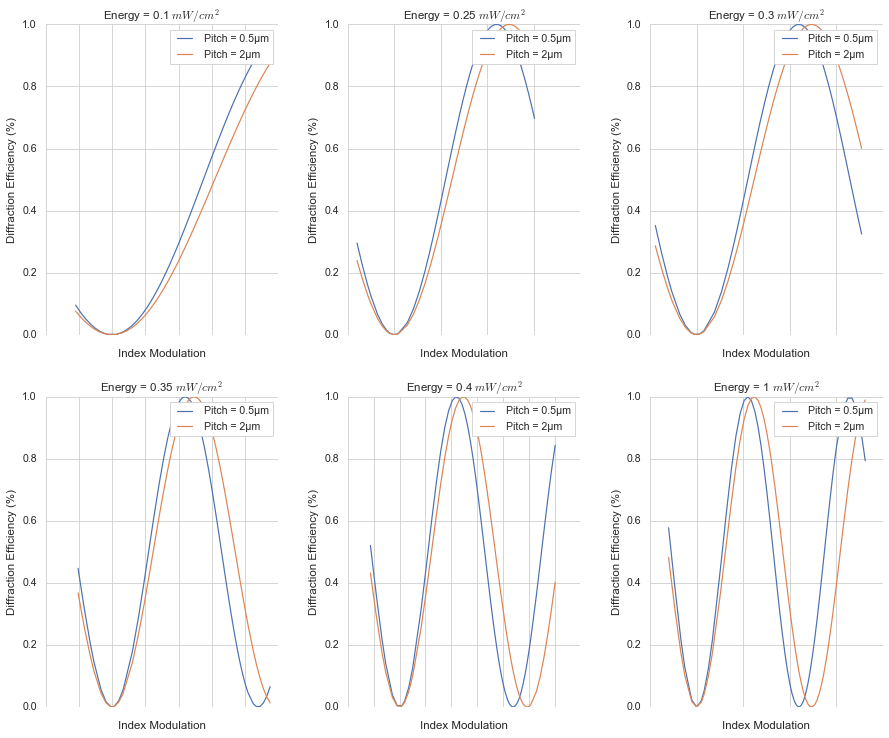

In [342]:
fig, axs = plt.subplots(figsize=(15,12), ncols=3, nrows=2)
sns.set(style='whitegrid', rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":10})
sns.set_context("paper", font_scale=1.2)


sns.lineplot(x = df1["Index_Modulation"], y = df1["Diffraction_Efficiency_p1"], label="Pitch = 0.5μm", ax=axs[0][0])
sns.lineplot(x = df1["Index_Modulation"], y = df1["Diffraction_Efficiency_p2"], label="Pitch = 2μm", ax=axs[0][0]).set(title="Energy = 0.1 $mW/cm^2$", xlabel="Exposure Time (s)")
sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency_p1"], label="Pitch = 0.5μm", ax=axs[0][1])
sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency_p2"], label="Pitch = 2μm", ax=axs[0][1]).set(title="Energy = 0.25 $mW/cm^2$", xlabel="Exposure Time (s)")
sns.lineplot(x = df3["Index_Modulation"], y = df3["Diffraction_Efficiency_p1"], label="Pitch = 0.5μm", ax=axs[0][2])
sns.lineplot(x = df3["Index_Modulation"], y = df3["Diffraction_Efficiency_p2"], label="Pitch = 2μm", ax=axs[0][2]).set(title="Energy = 0.3 $mW/cm^2$", xlabel="Exposure Time (s)")
sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency_p1"], label="Pitch = 0.5μm", ax=axs[1][0])
sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency_p2"], label="Pitch = 2μm", ax=axs[1][0]).set(title="Energy = 0.35 $mW/cm^2$", xlabel="Index Modulation")
sns.lineplot(x = df5["Index_Modulation"], y = df5["Diffraction_Efficiency_p1"], label="Pitch = 0.5μm", ax=axs[1][1])
sns.lineplot(x = df5["Index_Modulation"], y = df5["Diffraction_Efficiency_p2"], label="Pitch = 2μm", ax=axs[1][1]).set(title="Energy = 0.4 $mW/cm^2$", xlabel="Index Modulation")
sns.lineplot(x = df6["Index_Modulation"], y = df6["Diffraction_Efficiency_p1"], label="Pitch = 0.5μm", ax=axs[1][2])
sns.lineplot(x = df6["Index_Modulation"], y = df6["Diffraction_Efficiency_p2"], label="Pitch = 2μm", ax=axs[1][2]).set(title="Energy = 1 $mW/cm^2$", xlabel="Index Modulation")


plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.2, wspace=0.3)

   

for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right', fontweight='light', fontsize='small');
    ax.set_ylabel("Diffraction Efficiency (%)")
    ax.set_xlabel("Index Modulation")
    
sns.despine(left=True, bottom=True)                                                   

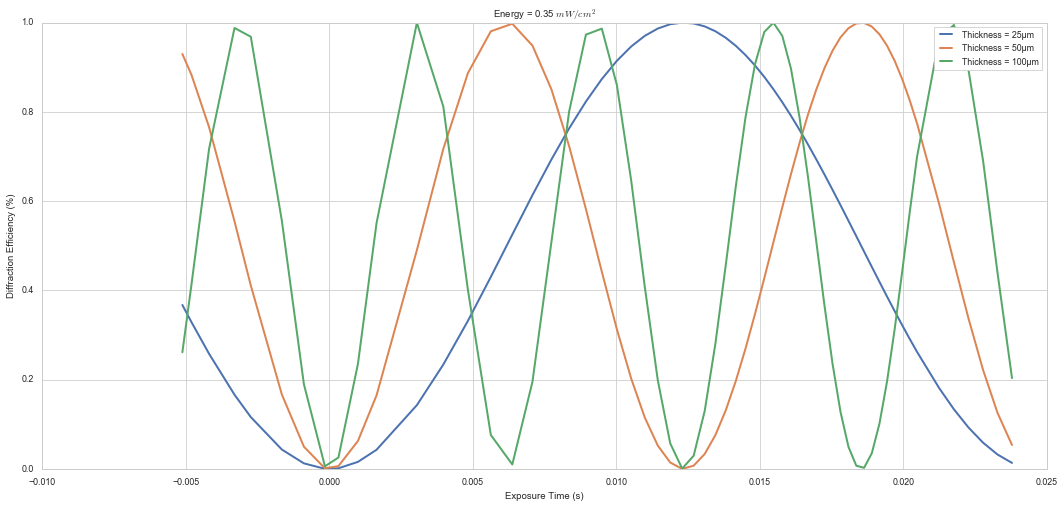

In [343]:
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")                                                 
paper_rc = {'lines.linewidth': 2}                  
sns.set_context("paper", rc = paper_rc)

sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency_L1"], label="Thickness = 25μm")
sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency_L2"], label="Thickness = 50μm")
sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency_L3"], label="Thickness = 100μm").set(title="Energy = 0.35 $mW/cm^2$", xlabel="Exposure Time (s)", ylabel="Diffraction Efficiency (%)");
#sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency_L4"], label="Thickness = 250μm")



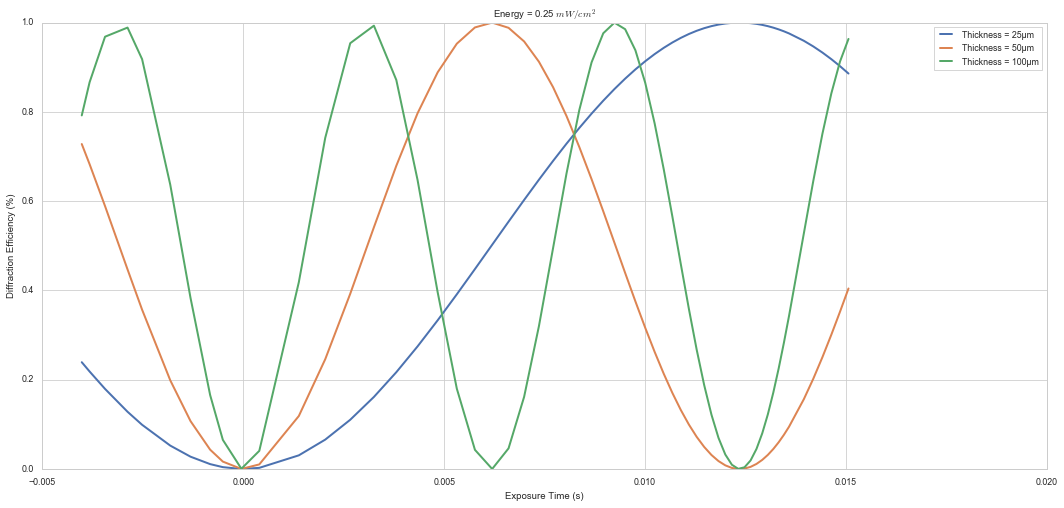

In [344]:
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")                                                 
paper_rc = {'lines.linewidth': 2}                  
sns.set_context("paper", rc = paper_rc)

sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency_L1"], label="Thickness = 25μm")
sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency_L2"], label="Thickness = 50μm")
sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency_L3"], label="Thickness = 100μm").set(title="Energy = 0.25 $mW/cm^2$", xlabel="Exposure Time (s)", ylabel="Diffraction Efficiency (%)");
#sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency_L4"], label="Thickness = 250μm")

    stage_angle  ext_angle  int_angle  Delta_theta_ext  Delta_theta_int  \
0         -25.0       -7.0  -4.660203            -25.0       -16.548910   
1         -24.0       -6.0  -3.995932            -24.0       -15.884639   
2         -23.0       -5.0  -3.330980            -23.0       -15.219688   
3         -22.0       -4.0  -2.665462            -22.0       -14.554170   
4         -21.0       -3.0  -1.999492            -21.0       -13.888200   
5         -20.0       -2.0  -1.333183            -20.0       -13.221891   
6         -19.0       -1.0  -0.666648            -19.0       -12.555356   
7         -18.0        0.0   0.000000            -18.0       -11.888708   
8         -17.0        1.0   0.666648            -17.0       -11.222060   
9         -16.0        2.0   1.333183            -16.0       -10.555525   
10        -15.0        3.0   1.999492            -15.0        -9.889216   
11        -14.0        4.0   2.665462            -14.0        -9.223245   
12        -13.0        5.

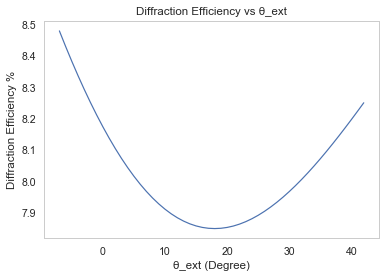

In [46]:
angles = {'stage_angle': np.arange(-25,25,1)}
df1 = pd.DataFrame(angles)
n = len(df1['stage_angle'])
l = len(df['Index_Modulation'])
Delta_n = df['Index_Modulation'].to_list()


Bragg_angle_ext = np.deg2rad(18) #Bragg angle for red beam, it is 12 for blue beam #EXTERNAL BRAGG
Bragg_angle_int = np.arcsin((1/1.5)*(np.sin(Bragg_angle_ext)))
df1.stage_angle = np.deg2rad(df1.stage_angle) #convert angles to radians to make them suitable for trigonometry functions
df1["ext_angle"] = Bragg_angle_ext + df1.stage_angle
df1["int_angle"] = np.arcsin((1/1.5)*(np.sin(df1.ext_angle))) #Snell's law for the external angle, to change to internal angles

df1['Delta_theta_ext'] = (df1.ext_angle - Bragg_angle_ext) #get the deviation from bragg angle
df1['Delta_theta_int'] = (df1.int_angle - Bragg_angle_int)



def kogelnik(Lambda=633e-9,Period=2e-6,n_nut=1.5,phi=90,Delta_Lambda=0,L=25e-6):
    K = (2*math.pi)/Period
    Beta = (2*math.pi*(n_nut))/Lambda
    for j in range(len(Delta_n)):
        for i in range(n):
            nu = ((math.pi*j*L)/(Lambda)*((((np.cos(Bragg_angle_int)**2))-((K*np.cos(phi)*np.cos(Bragg_angle_int))/Beta))**0.5))
            xi = (((df1.Delta_theta_int*K*np.sin(phi-Bragg_angle_int)-((Delta_Lambda*K**2)/(4*np.pi*n_nut)))*L)/2*((np.cos(df1.int_angle))-(K*np.cos(phi))/Beta))
            df1["xi"] = xi
            DE_K = (np.sin(((nu**2)+(df1.xi**2))**0.5)**2)/(1+(df1.xi**2)/(nu**2)) 
            df1["Delta_n"] = Delta_n
            df1["DE_Kogelnik"] = DE_K
    return DE_K

DE_K = kogelnik(Lambda=633e-9,Period=2e-6,n_nut=1.5,phi=90,Delta_Lambda=0,L=25e-6)
df1.Delta_theta_int = np.rad2deg(df1.Delta_theta_int) #Convert Δθ from radians to degree
df1.Delta_theta_ext = np.rad2deg(df1.Delta_theta_ext) #Convert Δθ from radians to degree
df1.int_angle = np.rad2deg(df1.int_angle)
df1.ext_angle = np.rad2deg(df1.ext_angle)
df1.stage_angle = np.rad2deg(df1.stage_angle)
df1.DE_Kogelnik = DE_K
print(df1) 

plt.plot(df1.ext_angle, df1.DE_Kogelnik*100)
plt.title("Diffraction Efficiency vs θ_ext")
plt.xlabel("θ_ext (Degree)")
plt.ylabel("Diffraction Efficiency %")
plt.grid()
plt.show()

In [ ]:
plt.plot(df1.ext_angle, df1.DE_Kogelnik*100)
plt.title("Diffraction Efficiency vs θ_ext")
plt.xlabel("θ_ext (Degree)")
plt.ylabel("Diffraction Efficiency %")
plt.grid()
plt.show()